In [95]:
# Importing Pandas and NumPy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Loading the dataset

country_data = pd.read_csv("Country-data.csv")

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [97]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
# Outliers didn't seem significant enough

country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [98]:
# Getting an overview of the data

country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [99]:
# Checking to see both the data types and any null values
# Since there are no null values, we can leave the data as is

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [100]:
# Importing libraries for clustering analysis

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [101]:
# Rescaling the data using StandardScaler

new_df = country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

scaler = StandardScaler()

new_df_scaled = scaler.fit_transform(new_df)
new_df_scaled.shape

(167, 9)

In [102]:
# Checking to see the transformed dataframe

new_df_scaled = pd.DataFrame(new_df_scaled)
new_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
new_df_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [103]:
# Performing a k-means clustering with an arbitrary k of 5 

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(new_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
# Getting the labels of each point

kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 4, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

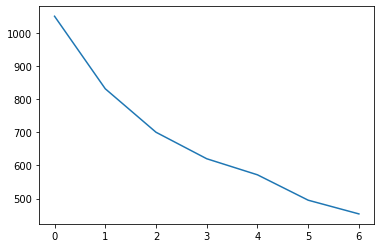

In [105]:
# Performing an elbow-curve/SSD to find the optimum number of clusters
# And, plotting the SSDs for each n_clusters

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

# From the elbow curve it seems that 2 is the most optimum number of clusters

In [106]:
# Performing a silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # Intializing kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # Calculating the silhouette score
    silhouette_avg = silhouette_score(new_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# From the analysis, it seems that 4 has the highest silhouette score. However, a k value of 4 doesn't seem appropriate as 
# the aim of the entire analysis is to determine which country is worse of in the lot. So, either a country should belong to
# a cluster of "better" countries or a cluster of "worse" countries

For n_clusters=2, the silhouette score is 0.28735668921406704
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29750893814718204
For n_clusters=5, the silhouette score is 0.2182493210148211
For n_clusters=6, the silhouette score is 0.23293312221599696
For n_clusters=7, the silhouette score is 0.24827056701134226
For n_clusters=8, the silhouette score is 0.2297199321818917


In [107]:
# Therefore, we use a final model with k=2

kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(new_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
# Relabelling each point 

kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [109]:
# Assigning the cluster label as a new column "cluster_id"

country_data['cluster_id'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


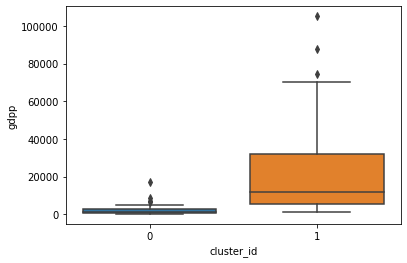

In [110]:
# Plotting a boxplot of each cluster in terms of its GDPP to see what the variation is within each cluster

sns.boxplot(x='cluster_id', y='gdpp', data=country_data)

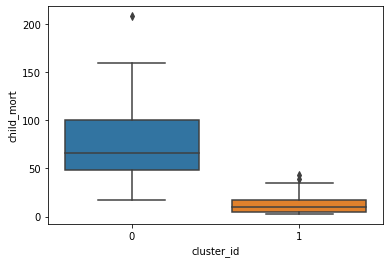

In [111]:
# Plotting a boxplot of each cluster in terms of its Child Mortality to see what the variation is within each cluster

sns.boxplot(x='cluster_id', y='child_mort', data=country_data)

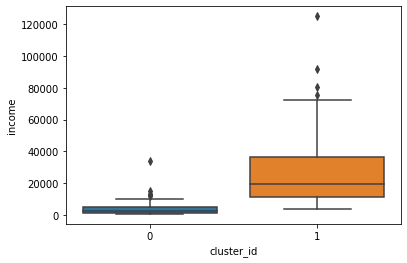

In [112]:
# Plotting a boxplot of each cluster in terms of its Income to see what the variation is within each cluster

sns.boxplot(x='cluster_id', y='income', data=country_data)

In [113]:
# Perfomrimg a hierarchical clustering

In [114]:
# Visualizing the rescaled dataset

new_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


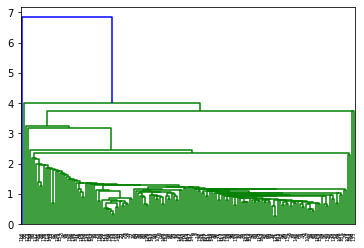

In [115]:
# Performing a single linkage first shows us 2 clusters

mergings = linkage(new_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

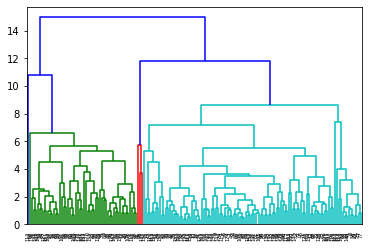

In [116]:
# Perfoming a complete linkage shows 3 clusters

mergings = linkage(new_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [117]:
# Choosing 3 clusters to see if it is a better clustering approach. Also, to see whether we can arrive to a list of the 
# extreme countries that direly need help

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [118]:
# Assigning hierarchical clustering labels as "cluster_labels"

country_data['cluster_labels'] = cluster_labels
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


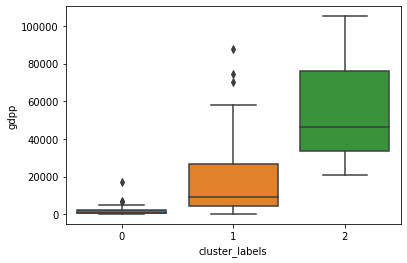

In [119]:
# Plotting a boxplot of each cluster in terms of its GDPP to see what the variation is within each cluster

sns.boxplot(x='cluster_labels', y='gdpp', data=country_data)

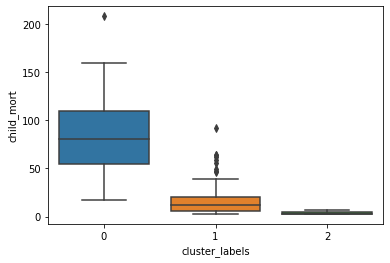

In [120]:
# Plotting a boxplot of each cluster in terms of its Child Mortality to see what the variation is within each cluster

sns.boxplot(x='cluster_labels', y='child_mort', data=country_data)

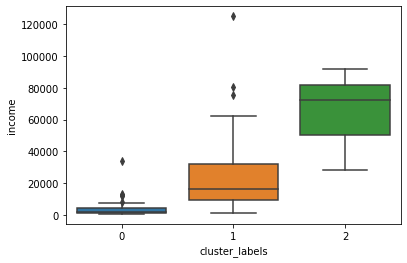

In [121]:
# Plotting a boxplot of each cluster in terms of its Income to see what the variation is within each cluster

sns.boxplot(x='cluster_labels', y='income', data=country_data)

In [122]:
# The countries' that would need the most help will be the ones that are catgorized into cluster '0' of both k-means 
# and hierarhical clustering

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


In [123]:
# Building on the previous hypothesis that countries categorized as "0" will be the ones that are worse through both k means 
# and hierarchical clustering exercises

country_new = country_data[(country_data['cluster_id'] == 0) & (country_data['cluster_labels'] == 0)]

In [124]:
# Getting an overview of the new dataset

country_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0
mean,84.071698,30.700377,6.691698,47.826415,3696.283019,10.864245,60.247170,4.800566,1880.075472,0.0,0.0
std,38.760455,17.671113,2.600933,18.831695,5081.531433,14.841667,6.795745,1.144635,2648.649299,0.0,0.0
min,17.400000,2.200000,2.460000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,0.0,0.0
25%,56.300000,18.700000,5.070000,34.400000,1410.000000,3.560000,57.100000,3.910000,563.000000,0.0,0.0
50%,81.000000,25.000000,5.890000,43.500000,2110.000000,6.810000,60.500000,4.980000,967.000000,0.0,0.0
75%,111.000000,40.200000,8.300000,58.600000,3370.000000,14.000000,65.400000,5.430000,2330.000000,0.0,0.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,104.000000,71.500000,7.490000,17100.000000,0.0,0.0


In [125]:
# Creating categories for each column and assigning them scores from 0 to -20, where 0 is the best and -20 is the worst

bins_1 = [17.0,56.3, 81.0, 111.0, 208.0]

country_new['Child Mortality Rating'] = pd.cut(country_new['child_mort'], bins=bins_1, labels = ["0","-5","-10","-20"])

bins_2 = [1, 5, 6, 8, 15]

country_new['Health Rating'] = pd.cut(country_new['health'], bins=bins_2, labels = ["0","-5","-10","-20"])

bins_3 = [31, 57, 60, 65, 72]

country_new['Life Expectancy Rating'] = pd.cut(country_new['life_expec'], bins=bins_3, labels = ["0","-5","-10","-20"])

bins_4 = [230, 563, 967, 2330, 17200]

country_new['GDPP Rating'] = pd.cut(country_new['gdpp'], bins=bins_4, labels = ["0","-5","-10","-20"])
country_new

C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels,Child Mortality Rating,Health Rating,Life Expectancy Rating,GDPP Rating
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,-10,-10,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,-20,0,-10,-20
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0,-10,0,-10,-5
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0,0,-20,-5,-20
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0,-20,-10,-5,-5
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0,-10,-20,-5,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,0,0,0,-5,-20,-5
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0,-10,-5,-5,-10
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0,-20,0,0,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,0,-20,0,0,-5


In [126]:
# Keeping only the new columns and removing redundancy

country_nex = country_new[['country', 'Child Mortality Rating', 'Health Rating', 'Life Expectancy Rating', 'GDPP Rating']]
country_nex.head()

,country,Child Mortality Rating,Health Rating,Life Expectancy Rating,GDPP Rating
0,Afghanistan,-10,-10,0,0
3,Angola,-20,0,-10,-20
17,Benin,-10,0,-10,-5
21,Botswana,0,-20,-5,-20
25,Burkina Faso,-20,-10,-5,-5


In [127]:
# Converting the datatypeto float in irder to perform further analysis

col_list = list(country_nex)
col_list.remove('country')

country_nex['Child Mortality Rating'] = country_nex['Child Mortality Rating'].astype(float)
country_nex['Health Rating'] = country_nex['Health Rating'].astype(float)
country_nex['Life Expectancy Rating'] = country_nex['Life Expectancy Rating'].astype(float)
country_nex['GDPP Rating'] = country_nex['GDPP Rating'].astype(float)

C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [128]:
# Creating a new variable "Total Score" which is essentially the sum of the individual scores
# This is basically a derived metric. The higher the "Total Score", the better off the country.
# So, we need to pay attention to the high negative value countries.

country_nex['Total Score'] = country_nex[col_list].sum(axis=1)

C:\Users\Neerja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
country_nex.head()

,country,Child Mortality Rating,Health Rating,Life Expectancy Rating,GDPP Rating,Total Score
0,Afghanistan,-10.0,-10.0,0.0,0.0,-20.0
3,Angola,-20.0,0.0,-10.0,-20.0,-50.0
17,Benin,-10.0,0.0,-10.0,-5.0,-25.0
21,Botswana,0.0,-20.0,-5.0,-20.0,-45.0
25,Burkina Faso,-20.0,-10.0,-5.0,-5.0,-40.0


In [130]:
# Sorting the countries according to descending values of Total Score to find the countries requiring
# help desperately.

# From the analysis, the top 5 countries that are in dire need of help are: Timor-Leste, Micronesia, Iraq, Angola and Samoa

country_nex = country_nex.sort_values(by=['Total Score'], ascending=True)
country_nex

,country,Child Mortality Rating,Health Rating,Life Expectancy Rating,GDPP Rating,Total Score
149,Timor-Leste,-5.0,-20.0,-20.0,-20.0,-65.0
101,"Micronesia, Fed. Sts.",0.0,-20.0,-20.0,-20.0,-60.0
72,Iraq,0.0,-20.0,-20.0,-20.0,-60.0
3,Angola,-20.0,0.0,-10.0,-20.0,-50.0
127,Samoa,0.0,-10.0,-20.0,-20.0,-50.0
21,Botswana,0.0,-20.0,-5.0,-20.0,-45.0
113,Nigeria,-20.0,-5.0,-10.0,-10.0,-45.0
65,Guyana,0.0,-5.0,-20.0,-20.0,-45.0
81,Kiribati,-5.0,-20.0,-10.0,-10.0,-45.0
151,Tonga,0.0,-5.0,-20.0,-20.0,-45.0
